# Importing Classes

In [54]:
import pickle
import pandas as pd
from nltk import sent_tokenize
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer 
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from project_classes import LemmaTokenizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize,sent_tokenize
import nltk 
import os

# Importing Data

In [25]:
# Load Pickled Dataframe from Cleaning Notebook into a DataFrame
path = r"C:\Users\Andrew\Documents\Metis\NLP_Inaugural_Addresses\Pickled_Files\cleaned_addresses.pkl"

df = pickle.load(open(path,'rb'))
df.head()

,president_number,term,pres_name,president_x,address,party,Year,time_period
0,1,1,Washington,01.Washington.1.txt,AMONG the vicissitudes incident to life no eve...,Nonpartisan,1789,pre-1800
1,1,2,Washington,01.Washington.2.txt,I AM again called upon by the voice of my coun...,Nonpartisan,1793,pre-1800
2,2,1,Adams,02.Adams.1.txt,"WHEN it was first perceived, in early times, ...",Federalist,1797,pre-1800
3,3,1,Jefferson,03.Jefferson.1.txt,CALLED upon to undertake the duties of the fi...,Democratic-Republican,1801,1800-1850
4,3,2,Jefferson,03.Jefferson.2.txt,"PROCEEDING, fellow-citizens, to that qualific...",Democratic-Republican,1805,1800-1850


# EDA

### Total sentences

In [26]:
# Number of sentences
df['total_sentences'] = df['address'].apply(lambda x: len(sent_tokenize(x)))

<AxesSubplot:xlabel='pres_name', ylabel='total_sentences'>

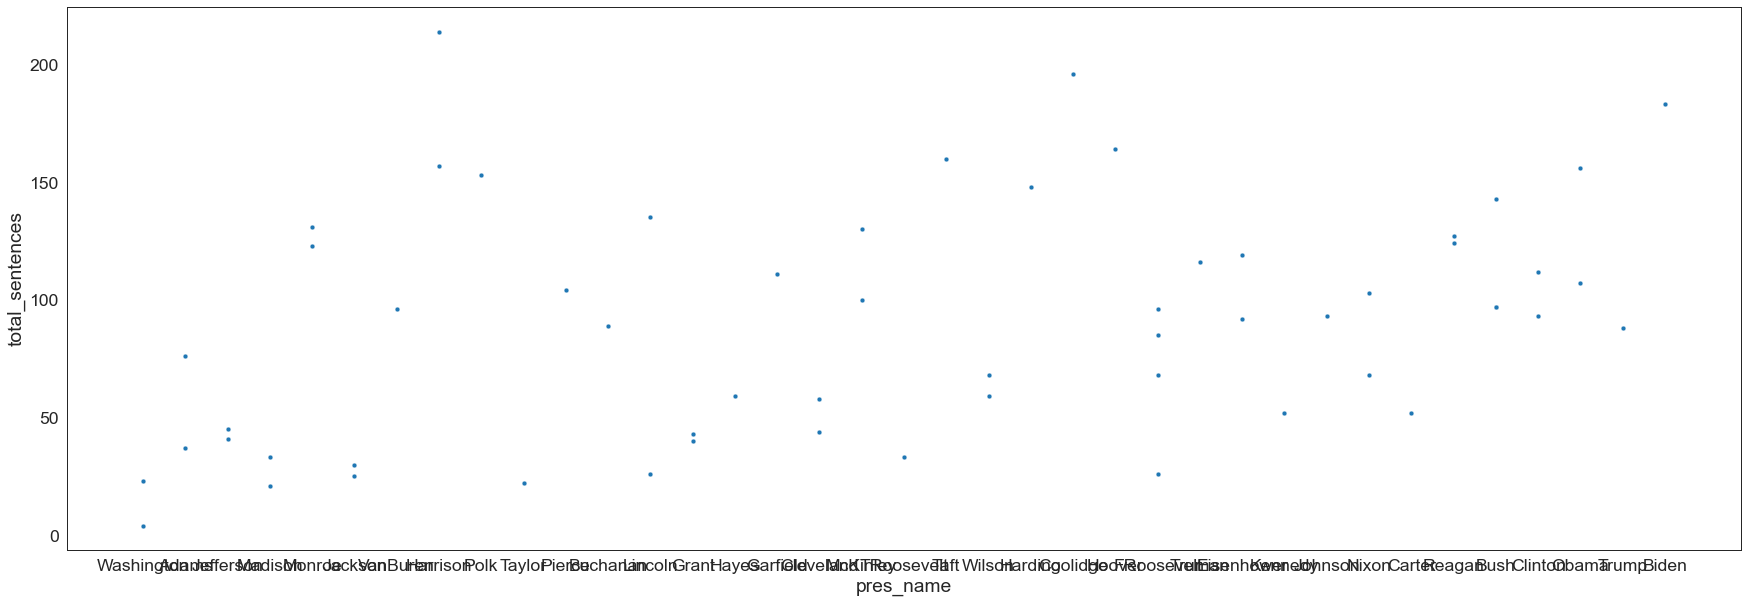

In [27]:
# Draw lineplot
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(y="total_sentences", x="pres_name",data=df,ax=ax)

### Word Count

In [28]:
# Number of words
df['total_words'] = df['address'].apply(lambda x: len(word_tokenize(x)))

<AxesSubplot:xlabel='pres_name', ylabel='total_words'>

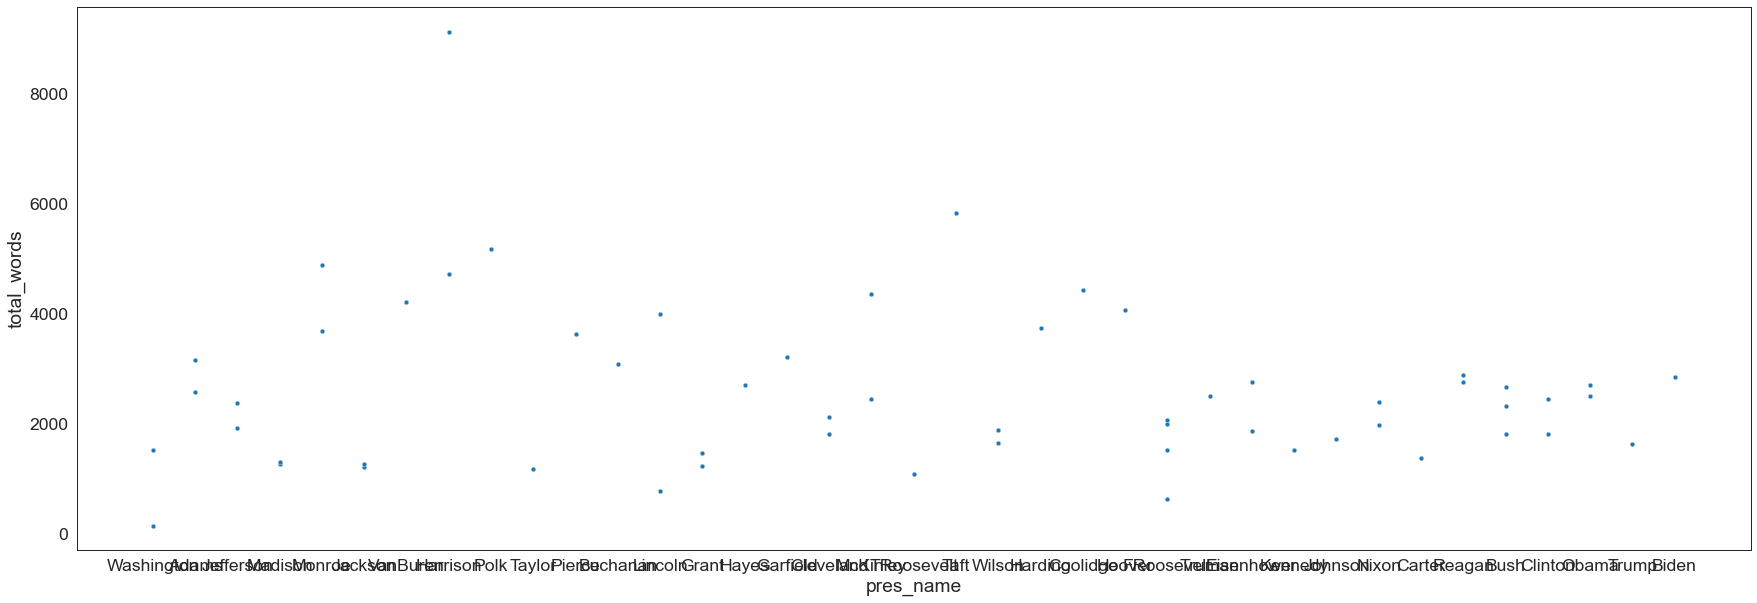

In [29]:
# Draw lineplot
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(y="total_words", x="pres_name",data=df,ax=ax)

## Words / Sentence

In [30]:
# Number of words / sentence
df['words_per_sentence'] = df['total_words']/df['total_sentences']

<AxesSubplot:xlabel='pres_name', ylabel='words_per_sentence'>

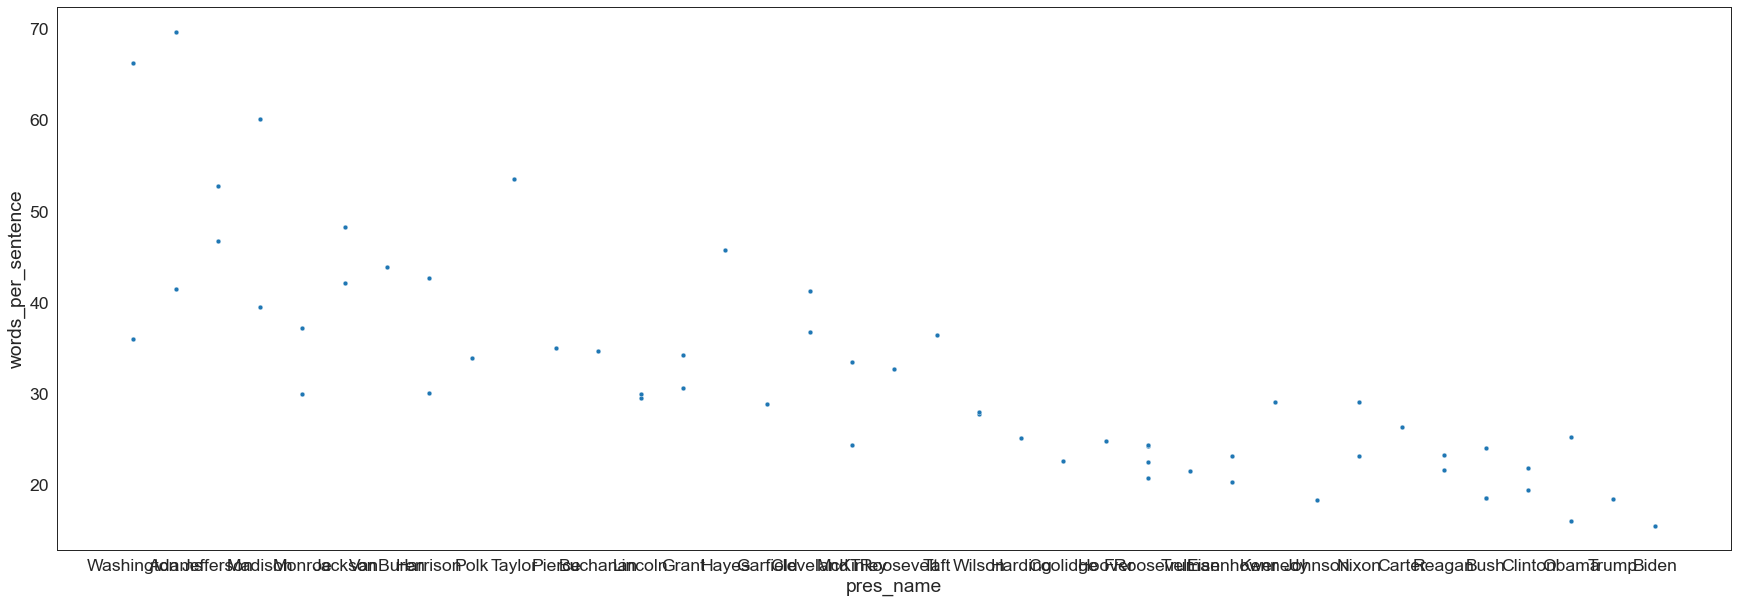

In [31]:
# Draw lineplot
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(y="words_per_sentence", x="pres_name",data=df,ax=ax)

## Counting the occurence of "We" vs. "I" (Total and Ratio)

In [32]:
my_vocabulary = ["i","we"]

In [33]:
text = df['address']

# Define Count Vectorizer
vectorizer = CountVectorizer(analyzer='word',token_pattern=r'\b[^\d\W]+\b')

# call `fit` to build the vocabulary
vectorizer.fit_transform(my_vocabulary)

# finally, call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

In [34]:
# Convert sparse array to numpy array
x_back = x.toarray()

In [35]:
# Create Word Matrix and merge with original matrix

df_i_we = pd.DataFrame(x_back, columns=vectorizer.get_feature_names())
df = pd.concat([df,df_i_we],axis=1)

# Create a column for ratio of we / i
df['I_We_Ratio'] = df['we']/result['i']

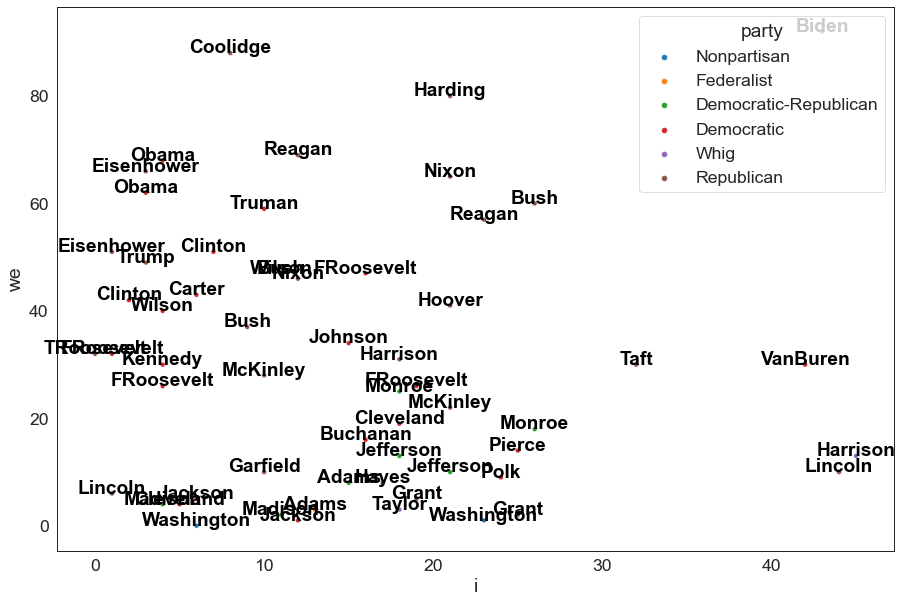

In [36]:
#Create figure
plt.figure(figsize = (15,10))

# Create scatterplot. alpha controls the opacity and s controls the size.
ax = sns.scatterplot(x = df.i, y = df.we, hue = df.party)

#For each point, we add a text inside the bubble
for line in range(0,df.shape[0]):
     ax.text(result.i.iloc[line], result.we.iloc[line], result.pres_name.iloc[line], horizontalalignment='center', size='medium', color='black', weight='semibold')

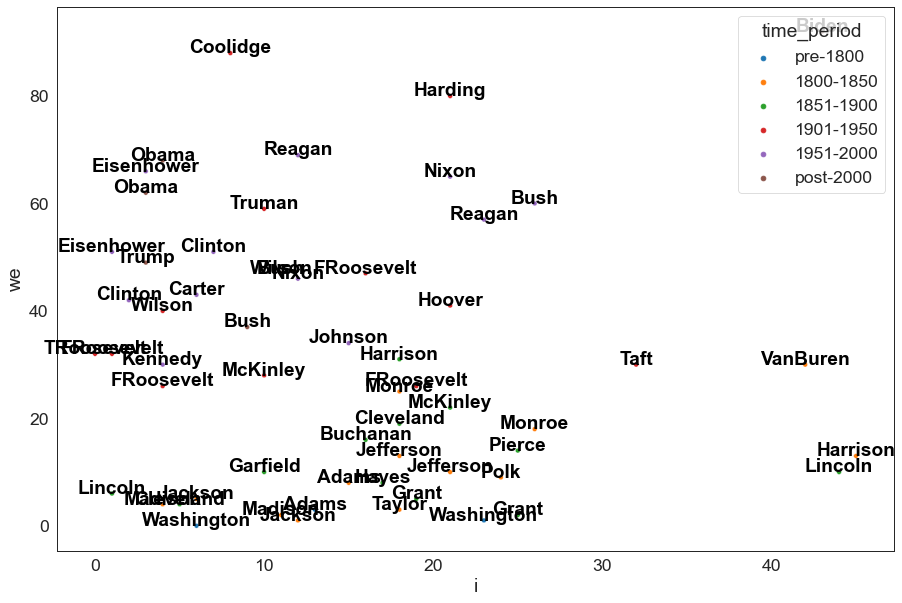

In [37]:
#Create figure
plt.figure(figsize = (15,10))

# Create scatterplot. alpha controls the opacity and s controls the size.
ax = sns.scatterplot(x = df.i, y = df.we, hue = df.time_period)

#For each point, we add a text inside the bubble
for line in range(0,df.shape[0]):
     ax.text(result.i.iloc[line], result.we.iloc[line], result.pres_name.iloc[line], horizontalalignment='center', size='medium', color='black', weight='semibold')

<AxesSubplot:xlabel='pres_name', ylabel='I_We_Ratio'>

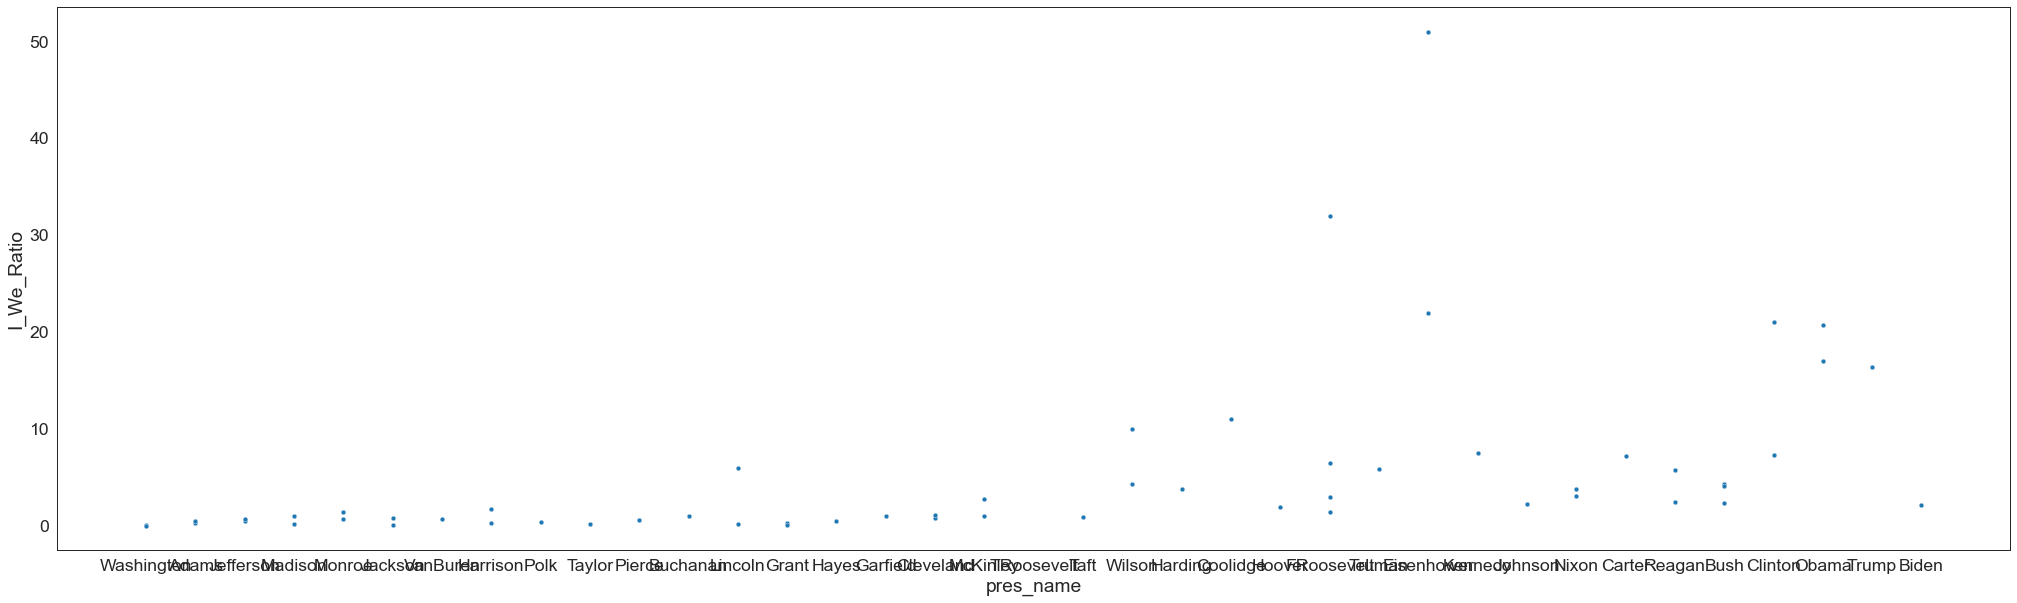

In [38]:
# Draw lineplot
fig_dims = (35, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(y='I_We_Ratio', x="pres_name",data=df,ax=ax)

In [39]:
## Top 10 Words

In [40]:
text = df['address']

# Define Count Vectorizer
vectorizer = CountVectorizer(analyzer='word',token_pattern=r'\b[^\d\W]+\b',ngram_range=(1,2))

# call `fit` to build the vocabulary
vectorizer.fit(text)

# finally, call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

In [41]:
# Convert sparse array to numpy array
x_back = x.toarray()

In [42]:
# View word Matrix

pd.DataFrame(x_back, columns=vectorizer.get_feature_names()).head()

,a,a bad,a balance,a balanced,a band,a banking,a baptism,a basic,a basis,a beachhead,...,zealous labors,zealously,zealously and,zealously contended,zealously devote,zealously devoted,zealously to,zealously unite,zone,zone and
0,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Determine what are the most common words

sum_words = x.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top_words = sorted(words_freq, key = lambda x: x[1], reverse=True)
top_words

[('the', 10197),
 ('of', 7175),
 ('and', 5402),
 ('to', 4606),
 ('in', 2832),
 ('a', 2300),
 ('our', 2230),
 ('we', 1837),
 ('that', 1820),
 ('of the', 1776),
 ('be', 1505),
 ('is', 1488),
 ('it', 1404),
 ('for', 1229),
 ('by', 1094),
 ('have', 1027),
 ('which', 1008),
 ('not', 981),
 ('with', 970),
 ('as', 970),
 ('will', 936),
 ('i', 883),
 ('this', 867),
 ('all', 839),
 ('in the', 830),
 ('are', 828),
 ('their', 767),
 ('to the', 722),
 ('but', 668),
 ('has', 633),
 ('of our', 629),
 ('government', 602),
 ('people', 594),
 ('from', 577),
 ('its', 573),
 ('or', 563),
 ('on', 552),
 ('us', 505),
 ('my', 498),
 ('can', 496),
 ('been', 496),
 ('and the', 475),
 ('no', 470),
 ('they', 463),
 ('so', 402),
 ('an', 392),
 ('who', 383),
 ('must', 374),
 ('upon', 374),
 ('at', 357),
 ('great', 345),
 ('world', 344),
 ('may', 341),
 ('those', 337),
 ('states', 334),
 ('nation', 331),
 ('them', 329),
 ('should', 327),
 ('it is', 324),
 ('by the', 323),
 ('more', 322),
 ('country', 320),
 ('to b

In [44]:
top_words_df = pd.DataFrame(top_words,columns=['word','count'])
top_words_df = top_words_df.head(10)

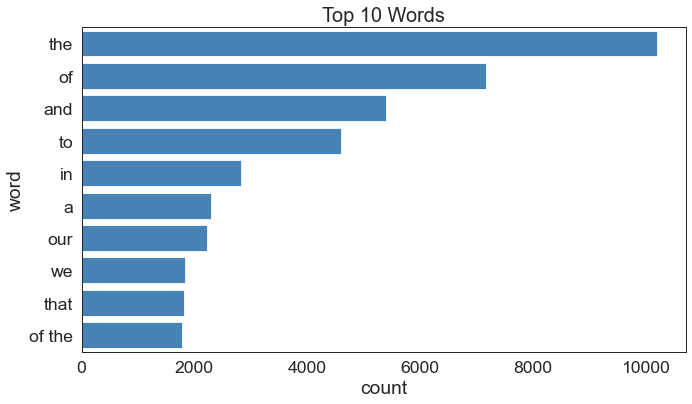

In [45]:
sns.set_context('paper', font_scale = 2)
sns.set_style("white")

f, ax = plt.subplots(figsize = (10, 6))

ax = sns.barplot(x = 'count', y = 'word',
            data= top_words_df, 
            color = "steelblue",
            capsize = 0.05,
            saturation = 8,
                         )
plt.title('Top 10 Words', fontsize = 20)
plt.tight_layout()

In [47]:
## Save to csv for tableau data visualization

In [56]:
# Load Pickled Dataframe from Cleaning Notebook into a DataFrame
path = r"C:\Users\Andrew\Documents\Metis\NLP_Inaugural_Addresses\Data\Visualization"

In [59]:
df.columns

Index(['president_number', 'term', 'pres_name', 'president_x', 'address',
       'party', 'Year', 'time_period', 'total_sentences', 'total_words',
       'words_per_sentence', 'i', 'we', 'I_We_Ratio'],
      dtype='object')

In [64]:
df_eda = df[['pres_name','party', 'Year', 'time_period', 'total_sentences', 'total_words',
            'words_per_sentence', 'i', 'we', 'I_We_Ratio']]

In [65]:
df_eda.to_csv(os.path.join(path,r'eda.csv'))

In [66]:
df_eda.head()

,pres_name,party,Year,time_period,total_sentences,total_words,words_per_sentence,i,we,I_We_Ratio
0,Washington,Nonpartisan,1789,pre-1800,23,1524,66.260870,23,1,0.043478
1,Washington,Nonpartisan,1793,pre-1800,4,144,36.000000,6,0,0.000000
2,Adams,Federalist,1797,pre-1800,37,2578,69.675676,13,3,0.230769
3,Jefferson,Democratic-Republican,1801,1800-1850,41,1916,46.731707,21,10,0.476190
4,Jefferson,Democratic-Republican,1805,1800-1850,45,2374,52.755556,18,13,0.722222
